In [1]:
%matplotlib inline
%load_ext autoreload

In [2]:
import os
os.chdir('/home/jaentrouble/adipose_train2')
print(os.getcwd())

/home/jaentrouble/adipose_train2


In [18]:
!git pull
%autoreload

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (2/2), done.
Unpacking objects:  80% (4/5)remote: Total 5 (delta 2), reused 5 (delta 2), pack-reused 0
Unpacking objects: 100% (5/5), 301.58 KiB | 502.00 KiB/s, done.
From https://github.com/jaentrouble/Adipos_tf_train2
   a5a820a..969c7b5  master     -> origin/master
Updating a5a820a..969c7b5
Fast-forward
 extra_models/hrnet.py |  1 -
 view_result.ipynb     | 34 +++++++++++++++++-----------------
 2 files changed, 17 insertions(+), 18 deletions(-)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with np.load('cell_mask_data.npz') as data:
    X = data['img']
    Y = data['mask']
print('X shape: ', X.shape, X.dtype)
print('Y shape: ', Y.shape, Y.dtype)

X shape:  (1533, 200, 200, 3) uint8
Y shape:  (1533, 200, 200) float32


In [6]:
X_test = X[1350:]
Y_test = Y[1350:]
X_train_small = X[:100]
Y_train_small = Y[:100]

In [7]:
import tensorflow as tf
from model_trainer import get_model
from adipose_models import *

In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus :
    try :
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [9]:
model_f = hr_5_3_0
savedfile_name = 'hr_5_3_0'
target_epoch = 35

In [10]:
test_model = get_model(model_f)
test_model.load_weights('savedmodels/'+savedfile_name+'/'+str(target_epoch))

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
HR_0 (HighResolutionModule)     [(None, 200, 200, 8) 3760        input_1[0][0]                    
__________________________________________________________________________________________________
HR_1 (HighResolutionModule)     [(None, 200, 200, 8) 19336       HR_0[0][0]                       
__________________________________________________________________________________________________
HR_2 (HighResolutionModule)     [(None, 200, 200, 8) 93088       HR_1[0][0]                       
                                                                 HR_1[0][1]            

In [11]:
test_model.evaluate(X_train_small, Y_train_small)
test_model.evaluate(X_test, Y_test)

6/6 [==============================] - 1s 107ms/step - loss: 0.5792 - binary_accuracy: 0.9700


[0.5792192220687866, 0.9700010418891907]

In [38]:
Target_X = X_train_small
Target_Y = Y_train_small
predict = test_model(Target_X)
print(predict.shape)

(100, 200, 200)


In [39]:
import random

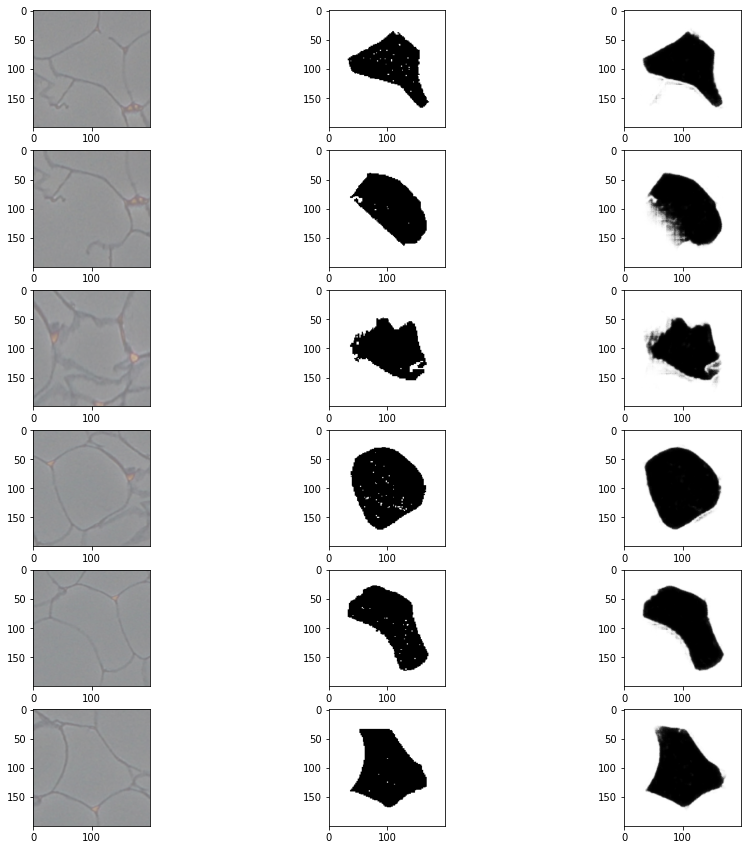

In [43]:
fig = plt.figure(figsize=(15,15))
i = 1
n = 6
# r = random.randrange(0,predict.shape[0]-n)
r = 0
for img, mask, pred in zip(Target_X[r:r+n], Target_Y[r:r+n], predict[r:r+n]):
    ax = fig.add_subplot(n,3,i)
    ax.imshow(img)
    ax = fig.add_subplot(n,3,i+1)
    ax.imshow(mask, cmap='binary')
    ax = fig.add_subplot(n,3,i+2)
    ax.imshow(pred, cmap='binary')
    i += 3
plt.show()

In [41]:
print(1-np.sum(Y[3]/(200*200)))

0.6848250329494476


In [42]:
print(np.max(pred))
print(np.min(pred))

0.99988306
2.3136015e-09
